## Homework 1

## <em>Numerical Integration and ODE/PDEs</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw1_U.ok')
_ = ok.auth(inline = True)

***

### Imports

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

#### Gaussian Quadrature

The manual function for Gaussian quadrature integration.

In [2]:

def gaussxw(N):
    '''Calculate 'N' position and weights for Gaussian quadrature integration
    Returns a tuple of 2 arrays, the first array is the position of points and second
    array is the corresponding weights.
    '''
    a = np.linspace(3, 4*N -1, N)/(4*N+2)
    x = np.cos(np.pi*a + 1/(8*N*N*np.tan(a)))
    eps = 1e-15
    delta = 1.
    #calc roots
    while delta>eps:
        p0 = np.ones(N)
        p1 = np.copy(x)
        for k in range(1, N):
            p0, p1 = p1, ((2*k +1)*x*p1 -k*p0)/(k+1)
        dp = (N+1)*(p0 -x*p1)/(1-x**2)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    
    #calc weights
    w = 2*(N+1)**2/(N*N*(1 - x**2)*dp**2)
    
    return x, w

def gaussxwab(N, a, b):
    '''Calculate 'N' position and weights for Gaussian quadrature integration
    between 'a' and 'b'
    Returns a tuple of 2 arrays, the first array is the position of points and second
    array is the corresponding weights.
    '''
    x, w = gaussxw(N)
    return 0.5*(b-a)*x + 0.5*(b+a), 0.5*(b-a)*w


#### Problem 1 - Harmonic Oscillator

The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$

<span style="color:blue"> Q1. Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude. </span>



In [3]:
def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    return np.sqrt(8)*(V(a) - V(x))**-0.5

<span style="color:blue"> Q2. Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'? </span>

<span style="color:blue"> Q3. Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique) </span>

In [4]:
#Part 2
a = 2

tquad = quad(timep, 0, a, args = (a, ))
print('Inbuilt Gaussian Quadrature gives time period = ', tquad[0], ' with error = ', tquad[1])

n = 10000
tquadn = fixed_quad(timep, 0, a, args = (a, ), n = n)[0]
tquadn2 = fixed_quad(timep, 0, a, args = (a, ), n = 2*n)[0]
print('\nFor n = %d, the time period is %0.3f, with error = %0.3e'%(n, tquadn, abs(tquadn2 - tquadn)))

Inbuilt Gaussian Quadrature gives time period =  1.8540746773017016  with error =  2.006794730391448e-10

For n = 10000, the time period is 1.854, with error = 3.079e-05


Use the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) to use Romberg integration. 

<span style="color:blue"> Q4. A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? </span>



The romberg gives error on simplistic call of the romberg(func, 0, a) where a is the amplitude because the end point of the integral diverges.

Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position.

<span style="color:blue"> Q5. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10. Show your calculation and compare it with the python warning.</span>

In [5]:
#Part 3
#The position tolerance is 10**-5

tromb = romberg(timep, 0, a-10**-5, args = (a,), divmax=10,show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x15112808c8> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 158.820789 
     2  0.999995 80.140687 53.913986 
     4  0.499997 40.852201 27.756040 26.012177 
     8  0.249999 21.248278 14.713636 13.844143 13.650999 
    16  0.124999 11.476276  8.218943  7.785963  7.689802  7.666424 
    32  0.062500  6.611947  4.990504  4.775274  4.727486  4.715869  4.712985 
    64  0.031250  4.195270  3.389711  3.282992  3.259305  3.253547  3.252118  3.251761 
   128  0.015625  2.997937  2.598826  2.546101  2.534404  2.531561  2.530855  2.530679  2.530635 
   256  0.007812  2.407066  2.210109  2.184195  2.178450  2.177054  2.176708  2.176621  2.176600  2.176594 
   512  0.003906  2.117141  2.020499  2.007858  2.005059  2.004379  2.004210  2.004168  2.004157  2.004155  2.004154 
  1024  0.001953  1.976062  1.929036  1.922939  1.921591  1.921263  1.921182  1.921162  1.921157  1.921155  1.921155  1.921155 

The final result i

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 8.299910e-02
  AccuracyWarning)


In [9]:
#Calculate Error
lastout = 1.921155
lastout1 = 2.004154
error = (1/(4**10 -1))*abs(lastout1 - lastout)
#See Newman's Computational Physics p. 161
print('Error on R_{10,10} is = ', error)

Error on R_{10,10} is =  7.915409007462534e-08


<span style="color:blue"> Q6. Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions. </span>


In [6]:
#When divmax = 15
tromb2 = romberg(timep, 0, a-10**-5, args = (a,), divmax=15,show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x1511280950> from [0, 1.99999]

 Steps  StepSize   Results
     1  1.999990 158.820789 
     2  0.999995 80.140687 53.913986 
     4  0.499997 40.852201 27.756040 26.012177 
     8  0.249999 21.248278 14.713636 13.844143 13.650999 
    16  0.124999 11.476276  8.218943  7.785963  7.689802  7.666424 
    32  0.062500  6.611947  4.990504  4.775274  4.727486  4.715869  4.712985 
    64  0.031250  4.195270  3.389711  3.282992  3.259305  3.253547  3.252118  3.251761 
   128  0.015625  2.997937  2.598826  2.546101  2.534404  2.531561  2.530855  2.530679  2.530635 
   256  0.007812  2.407066  2.210109  2.184195  2.178450  2.177054  2.176708  2.176621  2.176600  2.176594 
   512  0.003906  2.117141  2.020499  2.007858  2.005059  2.004379  2.004210  2.004168  2.004157  2.004155  2.004154 
  1024  0.001953  1.976062  1.929036  1.922939  1.921591  1.921263  1.921182  1.921162  1.921157  1.921155  1.921155  1.921155 
  2048  0.000977  1

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (15) exceeded. Latest difference = 1.213942e-03
  AccuracyWarning)


In [8]:
#The new error is
lastout2 = 1.851394
lastout21 = 1.852608
error2 = (1/(4**15 -1))*abs(lastout2 - lastout21)
print('Error on R_{15,15} is = ', error)

Error on R_{15,15} is =  7.915409007462534e-08


<span style="color:blue"> Q7. Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.  </span>

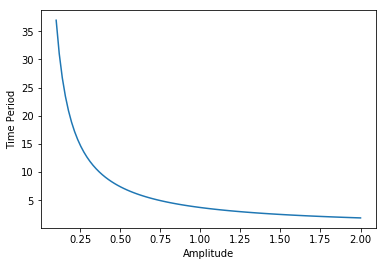

In [10]:
#Part 4
#Calculate points here
avals = np.linspace(1e-1, 2, 100)
tvals = np.zeros_like(avals)
tvals2 = np.zeros_like(avals)

#signature for the inbuilt function
#Feel free to replace it with inbuilt function
N = 100
for foo in range(avals.size):
    a = avals[foo]
    x, w = gaussxwab(N, 0, a)
    t = timep(x, a)
    tvals[foo] = (t*w).sum()


#Draw Figure here    
plt.plot(avals, tvals)
# plt.plot(avals, tvals2)
plt.xlabel('Amplitude')
plt.ylabel('Time Period')
plt.show()

***

#### Problem 2 - Black Body Radiation

The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$

<span style="color:blue"> Q1. Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? </span>


#### Hint

The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$

In [11]:
def blackbody_var(z):
    #z = x/(1+x)
    return z**3/(1 - z)**5 /(np.exp(z/(1.-z)) -1)
#     x = z/(1 - z)    
#     return x**3/(1 - z)**2 /(np.exp(x) -1)


#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
stfconst = 5.670367e-8
factor = k**4/c**2/hb**3/4/pi**2 


For Gaussian Quadrature
Evaluated =  5.662703503454043e-08 
True =  5.670367e-08 
Error =  1.3234889800848443e-23

For inbuilt-quad function 
Evaluated =  5.662703503454043e-08 
True =  5.670367e-08 
Residual =  0.0013514992144170825


According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$

<span style="color:blue"> Q2. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral. How accurate you think the answer is? </span>


In [16]:
print("For Gaussian Quadrature")
#Gaussian Quadrature
N =100
x, w = gaussxwab(N, 0, 1)
integral = (blackbody_var(x)*w).sum()
stefan = integral*factor

N =200
x, w = gaussxwab(N, 0, 1)
integral2 = (blackbody_var(x)*w).sum()
stefan2 = integral2*factor
print("Evaluated = ", stefan, "\nTrue = ",stfconst, "\nError = ", abs(stefan2-stefan))

print("\nFor inbuilt-quad function ")
#Quad
integral2 = quad(blackbody_var, 0, 1, full_output=True)[0]
stefan2 = integral2*factor
print("Evaluated = ", stefan2, "\nTrue = ",stfconst, "\nResidual = ", (stfconst-stefan2)/stfconst)

For Gaussian Quadrature
Evaluated =  5.662703503454043e-08 
True =  5.670367e-08 
Error =  1.3234889800848443e-23

For inbuilt-quad function 
Evaluated =  5.662703503454043e-08 
True =  5.670367e-08 
Residual =  0.0013514992144170825



<span style="color:blue"> Q3. Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer. </span>

In [14]:
def blackbody(x):
    
    return x**3/(np.exp(x) -1)

#When integrate to infinity
stf2 = quad(blackbody, 0, np.inf)
print("Evaluated =", stf2[0]*factor, ", Error", stf2[1]*factor)

Evaluated = 5.662703503454044e-08 , Error 2.2920211476443617e-17


***

#### Problem 3 - Gravitational Pull of Uniform Sheet

The gravitational force due to a plate felt by a point mass of 1 kg a distnace $z$ from the center of the square in the direction perpendicular to the sheet is given by 
$$ F_z = G \sigma z \int \int_{-L/2}^{L/2} \frac{dx dy}{(x^2 + y^2 + z^2)^{3/2}}$$
where $G = 6.674 \times 10 ^{-11} m^3 kg^{-1} s^{-2}$ and $\sigma$ is the mass per unit area. <br>

<span style="color:blue"> Q1. Write a program to calcualte and plot the force as a function of $z$ from $z=0$ to $z=10$ for a sheet of 10 metric tonnes and the sheet is $10\ m$ on side. Use Gaussian quadrature for the double integral. Though there is a 'dblquad' routine in python, we will make use of the manual functions defined above ("gaussxwab"). Study how the number of integration points 'N' affects the integral here. (Try N = 500 and N = 1000 and compare results: i.e. plot $F_z$ vs. $z$)</span>

In [17]:
#dblquad method

def force(x, y, z):
    return (x**2 + y**2 + z**2)**-1.5

L = 10.
# zz = np.linspace(0.01, 10, 500)
zz = np.logspace(-2, 1, 100)

f0 = np.zeros_like(zz)

for foo in range(zz.size):
    z = zz[foo]
    temp= dblquad(force, -5, 5, lambda x:-5, lambda x:5, args = (z,))[0]
    f0[foo] = z*temp
    
G = 6.67e-11
msig = 1e5/1e2
f0 *= G*msig


In [18]:
#Double loop method

def force(x, y, z):
    return (x**2 + y**2 + z**2)**-1.5

L = 10.
# zz = np.linspace(0.01, 10, 500)
zz = np.logspace(-2, 1, 100)    
G = 6.67e-11
msig = 1e5/1e2


f, f2 = np.zeros_like(zz), np.zeros_like(zz)

N1 = 500
xx1, w1 = gaussxwab(N1, -L/2., L/2.)

for foo in range(zz.size):
    z = zz[foo]
    temp = 0 
    for boo in range(xx1.size):
        temp += (z* w1[boo] * w1*force(xx1[boo], xx1, z)).sum()
    f[foo] = temp

N2 = 1000
xx2, w2 = gaussxwab(N2, -L/2., L/2.)

for foo in range(zz.size):
    z = zz[foo]
    for boo in range(xx2.size):
        f2[foo] += (z*w2[boo] * w2*force(xx2[boo], xx2, z)).sum()
    
f *= G*msig
f2 *= G*msig


In [19]:
#Broadcast Method

def force(x, y, z):
    return (x**2 + y**2 + z**2)**-1.5

L = 10.
zz = np.logspace(-2, 1, 100)    
G = 6.67e-11
msig = 1e5/1e2


f, f2 = np.zeros_like(zz), np.zeros_like(zz)

N = 500
xx, w = gaussxwab(N, -L/2., L/2.)
w1, w2 = w.reshape(1, -1), w.reshape(-1, 1)
xx1, xx2 = xx.reshape(1, -1), xx.reshape(-1, 1)

for foo in range(zz.size):
    z = zz[foo]
    f[foo] = z*(w1 * w2*force(xx1, xx2, z)).sum()

N = 1000
xx, w = gaussxwab(N, -L/2., L/2.)
w1, w2 = w.reshape(1, -1), w.reshape(-1, 1)
xx1, xx2 = xx.reshape(1, -1), xx.reshape(-1, 1)

for foo in range(zz.size):
    z = zz[foo]
    f2[foo] = z*(w1 * w2*force(xx1, xx2, z)).sum()

f *= G*msig
f2 *= G*msig


##### Hint: 
The loop is supposed to calculate the double integral. <br>
To fill in the for loop, study what is returned by the 'gaussxwab' function and how do you use it to evaluate the integral. The easiest thing that can possibly be done is write a triple for loop. <br>
However for loops are quite slow in python. You should be able to reduce it to a double loop by using inbuilt functions on numpy array. Take inspiration from here https://docs.scipy.org/doc/numpy/reference/routines.math.html <br>
The next way to avoid loops in python is use [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and/or use of numpy.einsum. Though you are not required to use it here, its nevertheless a handy thing to know about and this problem is one of the simplest cases where you can use it. You will not need to add any new loops inside the one given (though you may need to declare new variables), and it should be faster than both 2 and 3 for loops.

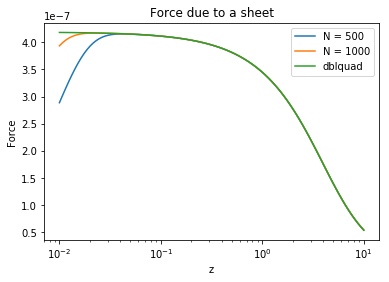

In [20]:
#Make plot
plt.plot(zz, f, label = 'N = 500')
plt.plot(zz, f2, label = 'N = 1000')
plt.plot(zz, f0, label = 'dblquad')
plt.legend(loc = 0)
plt.xlabel('z')
plt.ylabel('Force')
plt.xscale('log')
plt.title("Force due to a sheet")
plt.show()

***

#### Problem 4 - Planetary Orbit Integration

One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.

![alt text](elliptical_orbit.png "Title")

Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.

<span style="color:blue"> Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$. </span>

Hint:

$$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

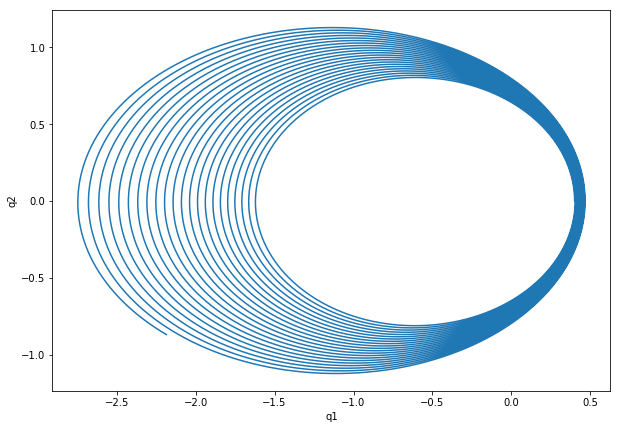

In [24]:
def dv1dt(d1, d2):
    return -( (d1**2+d2**2)**(-3/2) )*d1

def dv2dt(d1, d2):
    return -( (d1**2+d2**2)**(-3/2) )*d2

ecc = 0.6

v1 = 0
v2 = np.sqrt( (1+ecc)/(1-ecc) )
d1 = 1-ecc
d2 = 0

Nstep = 400000
tf = 200
t = np.linspace(0, tf, Nstep)  

d1trace = d1
d2trace = d2

v1trace = v1
v2trace = v2

for i in range(len(t)):
    oldd1 = d1
    oldd2 = d2
    d1 += tf/Nstep*v1
    d2 += tf/Nstep*v2
    v1 += tf/Nstep*dv1dt(oldd1, oldd2)
    v2 += tf/Nstep*dv2dt(oldd1, oldd2)
    
    d1trace = np.append(d1trace, d1) 
    d2trace = np.append(d2trace, d2) 
    
    v1trace = np.append(v1trace, v1) 
    v2trace = np.append(v2trace, v2) 

plt.figure(figsize = (10,7))
plt.plot( d1trace, d2trace )
plt.xlabel('q1')
plt.ylabel('q2')
plt.show()

<span style="color:blue"> Q2. Using 400000 steps, use the symplectic Euler method</span>

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 

<span style="color:blue"> Again plot the orbit of the planet. Compare your results in Q1 and Q2 by plotting both solutions in the same figure.</span>

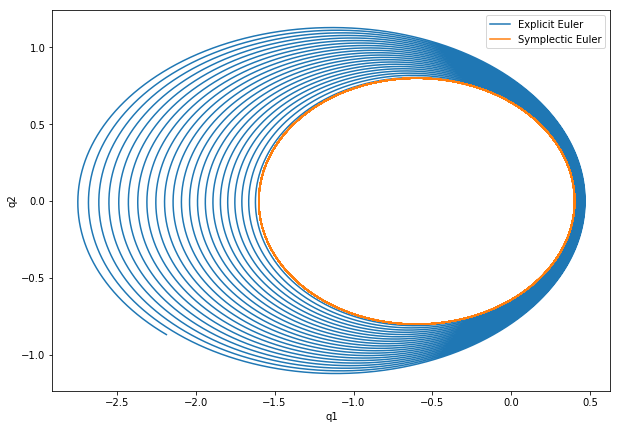

In [26]:
ecc = 0.6

Nstep = 400000
tf = 200
t = np.linspace(0, tf, Nstep)  


def Hd1(d1, d2):
    return ( (d1**2+d2**2)**(-3/2) )*d1

def Hd2(d1, d2):
    return ( (d1**2+d2**2)**(-3/2) )*d2


d1trace_symp = np.zeros(Nstep)
d2trace_symp = np.zeros(Nstep)
v1trace_symp = np.zeros(Nstep)
v2trace_symp = np.zeros(Nstep)

d1trace_symp[0] = 1-ecc
d2trace_symp[0] = 0
v1trace_symp[0] = 0
v2trace_symp[0] = np.sqrt( (1+ecc)/(1-ecc) )

for i in range(1, Nstep):
    v1trace_symp[i] = v1trace_symp[i-1] - tf/Nstep*Hd1(d1trace_symp[i-1], d2trace_symp[i-1])
    v2trace_symp[i] = v2trace_symp[i-1] - tf/Nstep*Hd2(d1trace_symp[i-1], d2trace_symp[i-1])
    d1trace_symp[i] = d1trace_symp[i-1] + tf/Nstep*v1trace_symp[i]
    d2trace_symp[i] = d2trace_symp[i-1] + tf/Nstep*v2trace_symp[i]

plt.figure(figsize = (10,7))
plt.plot( d1trace, d2trace, label = 'Explicit Euler')
plt.plot( d1trace_symp, d2trace_symp, label = 'Symplectic Euler' )
plt.xlabel('q1')
plt.ylabel('q2')
plt.legend()
plt.show()

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 



In [ ]:
_ = ok.submit()
